<h1>Mis notas: Algoritmos de Machine Learning con Scikit-Learn<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clasificación-con-Naive-Bayes" data-toc-modified-id="Clasificación-con-Naive-Bayes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clasificación con Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Clasificador-de-Naive-Bayes-Gaussiano" data-toc-modified-id="Clasificador-de-Naive-Bayes-Gaussiano-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clasificador de Naive Bayes Gaussiano</a></span></li><li><span><a href="#Clasificador-de-Naive-Bayes-Multinomial" data-toc-modified-id="Clasificador-de-Naive-Bayes-Multinomial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clasificador de Naive Bayes Multinomial</a></span></li><li><span><a href="#Cuándo-usar-Naive-Bayes" data-toc-modified-id="Cuándo-usar-Naive-Bayes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cuándo usar Naive Bayes</a></span></li></ul></li><li><span><a href="#Regresión-lineal" data-toc-modified-id="Regresión-lineal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regresión lineal</a></span><ul class="toc-item"><li><span><a href="#Regresión-lineal-simple" data-toc-modified-id="Regresión-lineal-simple-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regresión lineal simple</a></span></li><li><span><a href="#Regresión-lineal-múltiple" data-toc-modified-id="Regresión-lineal-múltiple-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Regresión lineal múltiple</a></span></li><li><span><a href="#Regresión-con-funciones-base" data-toc-modified-id="Regresión-con-funciones-base-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regresión con funciones base</a></span><ul class="toc-item"><li><span><a href="#Funciones-base-polinómicas" data-toc-modified-id="Funciones-base-polinómicas-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Funciones base polinómicas</a></span></li><li><span><a href="#Funciones-base-gaussianas" data-toc-modified-id="Funciones-base-gaussianas-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Funciones base gaussianas</a></span></li><li><span><a href="#Regularización" data-toc-modified-id="Regularización-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Regularización</a></span><ul class="toc-item"><li><span><a href="#Regresión-Ridge-(Regularización-$L_2$)" data-toc-modified-id="Regresión-Ridge-(Regularización-$L_2$)-2.3.3.1"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Regresión Ridge (Regularización $L_2$)</a></span></li><li><span><a href="#Regresión-Lasso-(Regularización-$L_1$)" data-toc-modified-id="Regresión-Lasso-(Regularización-$L_1$)-2.3.3.2"><span class="toc-item-num">2.3.3.2&nbsp;&nbsp;</span>Regresión Lasso (Regularización $L_1$)</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#SVM-con-kernel" data-toc-modified-id="SVM-con-kernel-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SVM con kernel</a></span></li><li><span><a href="#Cuándo-usar-SVM" data-toc-modified-id="Cuándo-usar-SVM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cuándo usar SVM</a></span></li></ul></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forests</a></span><ul class="toc-item"><li><span><a href="#Árboles-de-decisión" data-toc-modified-id="Árboles-de-decisión-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Árboles de decisión</a></span></li><li><span><a href="#Ensamblado-de-estimadores" data-toc-modified-id="Ensamblado-de-estimadores-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ensamblado de estimadores</a></span></li><li><span><a href="#Regresión-con-Random-Forests" data-toc-modified-id="Regresión-con-Random-Forests-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Regresión con Random Forests</a></span></li><li><span><a href="#Cuándo-usar-Random-Forests" data-toc-modified-id="Cuándo-usar-Random-Forests-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Cuándo usar Random Forests</a></span></li></ul></li><li><span><a href="#Análisis-de-componentes-principales" data-toc-modified-id="Análisis-de-componentes-principales-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Análisis de componentes principales</a></span><ul class="toc-item"><li><span><a href="#PCA-para-describir-un-dataset" data-toc-modified-id="PCA-para-describir-un-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PCA para describir un dataset</a></span></li><li><span><a href="#PCA-para-reducir-la-dimensionalidad" data-toc-modified-id="PCA-para-reducir-la-dimensionalidad-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>PCA para reducir la dimensionalidad</a></span></li><li><span><a href="#PCA-para-visualización" data-toc-modified-id="PCA-para-visualización-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>PCA para visualización</a></span></li><li><span><a href="#PCA-para-filtrado-de-ruido" data-toc-modified-id="PCA-para-filtrado-de-ruido-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>PCA para filtrado de ruido</a></span></li><li><span><a href="#Cuándo-usar-PCA" data-toc-modified-id="Cuándo-usar-PCA-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Cuándo usar PCA</a></span></li></ul></li></ul></div>

> **Disclaimer**: Este notebook contiene mis notas sobre implementaciones de algoritmos de Machine Learning con Scikit-Learn, resumiendo básicamente el [capítulo 5](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html) de [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) escrito por [Jake VanderPlas](http://vanderplas.com/). Recomiendo leer la fuente original e ir ejecutando todos los ejemplos (___learn by doing!___).

> Para ver ejemplos con código podemos visitar la página oficial de [Scikit-Learn](https://scikit-learn.org/stable/auto_examples/index.html), que tiene un enorme directorio de ejemplos.

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.pipeline import make_pipeline
from scipy import stats
from ipywidgets import interact, fixed

## Clasificación con Naive Bayes

Los algoritmos basados en Naive Bayes son bastante sencillos y extremadamente rápidos, por lo que se usan como un buen punto de partida para clasificación.

El Teorema de Bayes nos da la probabilidad de una etiqueta $L_1$ observadas unas caracteristicas $f : (f_1, f_2, ..., f_n)$ como:

> $P(L_1|f)=\frac{P(f|L_1)P(L_1)}{P(f)}$

Si tenemos 2 etiquetas podremos clasificar una observación evaluando el siguiente ratio:

> $\frac{P(L_1|f)}{P(L_2|f)}=\frac{P(f|L_1)P(L_1)}{P(f|L_2)P(L_2)}$

O visto de otra forma, escogeremos la etiqueta $L_i$ que maximice la expresión:

> $P(f|L_i)P(L_i)$

Pero obtener $P(f|L_i)$ no es sencillo. Precisamente Naive bayes asume ciertas cosas para simplificar nuestro clasificador. Dependiendo de la suposición tendremos distintos algoritmos. 

### Clasificador de Naive Bayes Gaussiano

Es la versión más sencilla, en la que asumimos que los datos de cada etiqueta siguen una distribución gaussiana. Vemos un ejemplo de dataset:

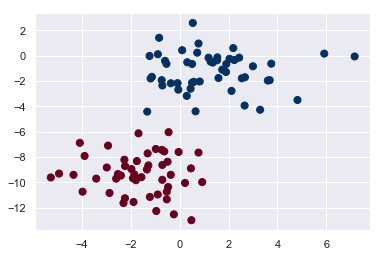

In [2]:
from sklearn.datasets import make_blobs

# Creamos el dataset
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Con la asunción anterior:

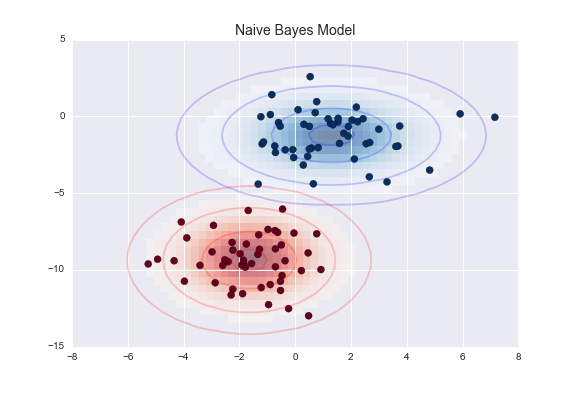

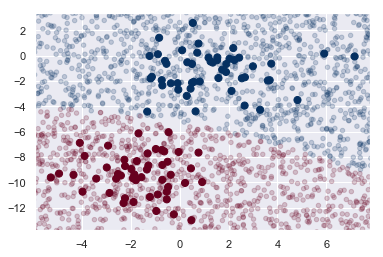

In [3]:
from sklearn.naive_bayes import GaussianNB # Elegimos la clase del modelo
model = GaussianNB()                       # Creamos el modelo, sin parámetros
model.fit(X, y)                            # Entrenamos el modelo con los datos anteriores

# Generamos nuevos datos que clasificaremos usando nuestro modelo
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)                 # Clasificamos las nuevas muestras como 0 o 1

# Pintamos las nuevas muestras con su etiqueta
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim);

Podemos obtener la probabilidad a posteriori de cada etiqueta para cada observación usando el método `predict_proba()`:

In [4]:
yprob = model.predict_proba(Xnew)
yprob.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Clasificador de Naive Bayes Multinomial

En este caso se asume que las muestras siguen una simple distribución multinomial, que no es más que una generalización de la distribución binomial para varias categorías. Esta distribución describe la probabilidad de que se dé una combinación concreta del número de casos encuadrados dentro de las distintas categorías para N sucesos. 

Esta asunción será adecuada cuando las características de nuestro dataset representen apariciones o porcentajes de apariciones. Un ejemplo donde se suele usar mucho es en **clasificación de texto**, donde las características hacen referencia al número de apariciones de una palabra o a su frecuencia dentro de documentos.

Vemos un ejemplo con un corpus de documentos pertenecientes a varios grupos de noticias:

In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
# Seleccionamos unas cuantas categorías y creamos los subconjuntos de entrenamiento y de test
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

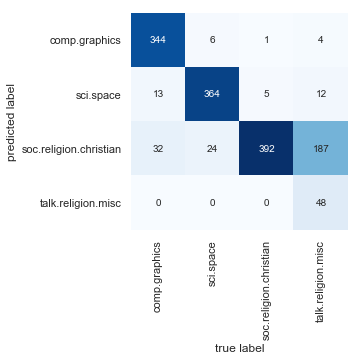

In [7]:
# Convertiremos el contenido de cada texto en un vector de números (feature engineering)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB               # Elegimos la clase para el modelo
model = make_pipeline(TfidfVectorizer(), MultinomialNB())   # Tubería con la vectorización y la instancia del modelo
model.fit(train.data, train.target)                         # Entrenamos el modelo
labels = model.predict(test.data)                           # Predecimos las categorías

# Validación del modelo usando la matriz de confusión
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

Para el clasificador fue fácil diferenciar temas distintos, pero se confundió bastante en el caso de los dos grupos que trataban sobre religión.

Podemos predecir la categoría de un nuevo texto:

In [8]:
pred = model.predict(['Jesus was jewish'])
train.target_names[pred[0]]

'soc.religion.christian'

### Cuándo usar Naive Bayes

Ventajas de estos algoritmos:
 * Extremadamente rápidos
 * Predicción probabilística sencilla
 * Por lo general muy fáciles de interpretar
 * Pocos hiperparámetros (o ninguno)

Cuándo usarlos:
 * Para obtener una **clasificación generativa** (las observaciones asociadas a cada etiqueta siguen una distribución) que sirva como punto de partida
 * Cuando las asunciones realmente sirvan para los datos (raro en la práctica)
 * Para categorías bien separadas, donde la complejidad es menos importante
 * Para datos con muchas dimensiones, donde la complejidad es menos importante
 
Ojo! más dimensiones implica más posibilidades de que los datos estén mejor separados.

## Regresión lineal

Al igual que Naive Bayes es un buen punto de partida para clasificación, la regresión lineal lo es para el caso de regresión.

### Regresión lineal simple

En el caso más simple de regresión lineal tendremos una recta de la forma:

> $y = ax + b$

donde $a$ es la pendiente y $b$ el offset o punto de intersección con el eje y.

Vemos un ejemplo:

a: 2.027208810360695
b: -4.998577085553202


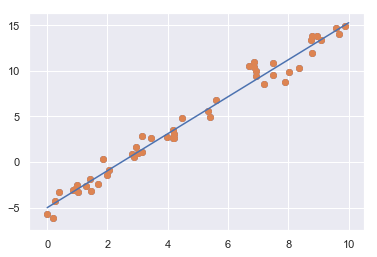

In [9]:
# Datos de entrenamiento
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

# Modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

# Datos de test
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Coeficientes
print("a:", model.coef_[0])
print("b:", model.intercept_)

# Gráfica
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Regresión lineal múltiple

Podemos usar también el estimador `LinearRegression` para el caso en que tengamos más de dos dimensiones. Por ejemplo, para el caso de 3 dimensiones obtendremos un plano de la forma:

> $y = a_0 + a_1x_1 + a_2x_2$

y así sucesivamente (obteniendo un hiperplano para más de 3 dimensiones). Es más complicado representarlo, pero podemos obtener los coeficientes igual que en el caso de la regresión simple.

### Regresión con funciones base

Aunque la regresión lineal parece restringida a relaciones lineales entre variables, podemos adaptarla para relaciones no lineales transformando los datos con funciones base.

La idea es tomar el modelo lineal multidimensional:

> $y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$

y crear esas variables a partir de una variable unidimensional $x$; es decir, transformaremos $x_i$ en una función $f_i(x)$.

#### Funciones base polinómicas

Usando funciones del tipo $f_i(x) = x^i$ obtendremos:

> $y = a_0 + a_1x + a_2x^2 + a_3x^3 + ...$

Esta proyección polinomial está incluida en Scikit-Learn, usando el transformador `PolynomialFeatures`. Vemos un ejemplo donde pasamos de una variable unidimensional a un array tridimensional:

In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Esta nueva versión de los datos puede ser enchufada a una regresión lineal. La mejor forma de hacerlo es mediante una tubería:

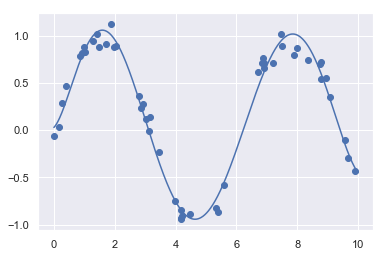

In [11]:
# Tubería: transformación + modelo
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression()) # polinomio de grado 7

# Dataset
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# Entrenamiento
poly_model.fit(x[:, np.newaxis], y)

# Transformación + Regresión
yfit = poly_model.predict(xfit[:, np.newaxis])

# Gráfica
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Funciones base gaussianas

Podemos usar otro tipo de funciones que no sean polinómicas. Un ejemplo serían las funciones gaussianas. Este tipo de funciones no está incluido en Scikit-Learn, pero es realmente sencillo de implementar, creando una clase que herede de BaseEstimator y de TransformerMixin.

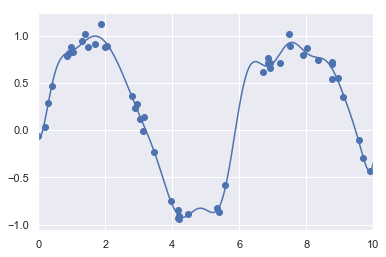

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

#### Regularización

La introducción de funciones base implica más flexibilidad, pero también el peligro de sobreajuste. Se pueden limitar las oscilaciones extremas de la curva usando lo que se conoce como **regularización**, que no es más que una penalización de valores grandes en los parámetros del modelo.

Si subimos el número de gaussianas veremos el problema:

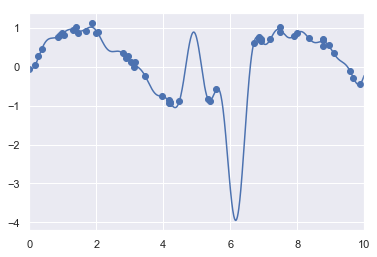

In [13]:
gauss_model = make_pipeline(GaussianFeatures(30), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

##### Regresión Ridge (Regularización $L_2$)

Tenemos disponible esta regularización en la clase `Ridge`. Simplemente tendremos que añadirla en nuestra tubería:

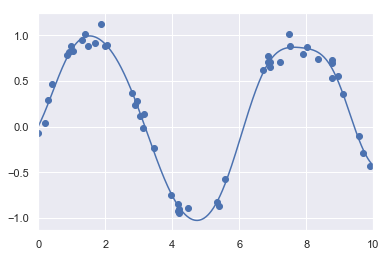

In [14]:
from sklearn.linear_model import Ridge
gauss_model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

##### Regresión Lasso (Regularización $L_1$)

Igualmente tenemos disponible esta regularización en la clase `Lasso`:

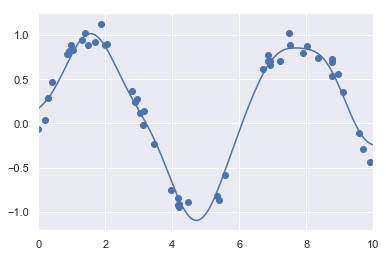

In [15]:
from sklearn.linear_model import Lasso
gauss_model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.005))
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Support Vector Machines

Las máquinas de vectores de soporte (SVM) constituyen una clase de algoritmos muy potente y flexible, tanto para clasificación como para regresión.

Igual que Naive Bayes era un ejemplo de clasificación generativa (los datos pertenecientes a cada etiqueta se generan según una distribución), SVM es un ejemplo de **clasificación discriminativa**; en lugar de modelar cada clase, buscamos una curva (2D) o una "variedad"/"manifold" (3D ó +) que separe las muestras.

Vemos un ejemplo de clasificación de observaciones bien separadas en 2D:

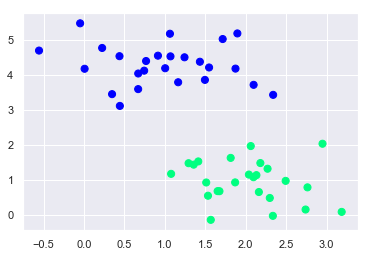

In [16]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

En este caso tan claro podríamos incluso dibujar una línea recta a mano para marcar la frontera. Pero tenemos más de una posibilidad... ¿cuál es la óptima?

Con SVM lo que intentamos es encontrar la línea que maximice el margen entre los puntos más cercanos de cada categoría. Ese será el modelo óptimo.

Usamos el clasificador de vectores de soporte (**SVC**) de Scikit-Learn para crear el modelo que se ajuste a los datos anteriores:

In [17]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

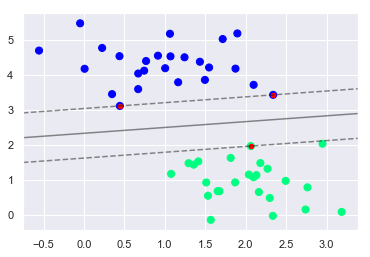

In [18]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creamos cuadrícula para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Dibujamos la línea de separación óptima con los márgenes
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Dibujamos los vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=20, linewidth=1, facecolors='red');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

Esta es la recta que maximiza el margen entre los dos conjuntos de puntos. Las muestras marcadas en rojo son los pivotes del ajuste, y se conocen como los **vectores de soporte**, dando nombre al algoritmo. Podemos acceder a ellos usando el atributo `support_vectors_` del modelo:

In [19]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Existe la posibilidad de relajar los márgenes, por ejemplo cuando tenemos muestras que se solapan en el espacio. Podemos aplicar validación cruzada para obtener la recta y los márgenes óptimos.

### SVM con kernel

Donde SVM realmente destaca es en combinación con los **kernels**. Ya hemos visto una versión de estos kernels cuando proyectamos nuestros datos en un espacio dimensional más grande para poder modelar relaciones no lineales con un clasificador lineal. Con SVM podemos usar una versión de la misma idea.

Vemos un ejemplo con datos que no son linealmente separables:

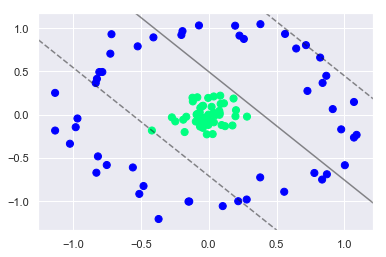

In [20]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

Lo que podemos hacer en este caso es crear una tercera dimensión y proyectar los datos usando una función base radial, de tal forma que en dicha dimensión queden separados:

In [21]:
r = np.exp(-(X ** 2).sum(1))

In [22]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[30, 0], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(30, 0), value=30), IntSlider(value=30, description…

Con la dimensión adicional podemos separar fácilmente las muestras dibujando un plano por ejemplo r=0,7.

Lo complicado será elegir la función base adecuada para conseguir un resultado tan bueno como este, y además saber dónde centrarla. Una estrategia para llevarlo a cabo sería usar la tranformación de kernel, centrando la función base en cada muestra del dataset y evaluando el resultado. La potencia de cálculo requerida crecería mucho con el tamaño del dataset, pero podemos usar el *truco del kernel*, incluido en SVM, que nos evita construir las N proyecciones en N dimensiones.

En Scikit-Learn sólo tenemos que cambiar nuestro kernel lineal por un kernel RBF (radial basis function):

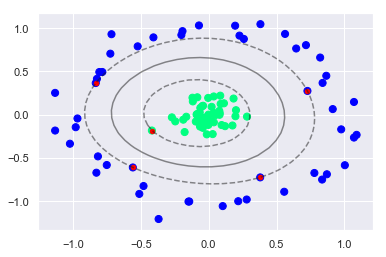

In [23]:
clf = SVC(kernel='rbf', gamma='auto', C=1E6).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

Con SVM kernelizado hemos conseguido crear una curva de discriminación no lineal. Esta estrategia se usa mucho en Machine Learning para convertir eficientes metodos lineales en no lineales, especialmente cuando se puede usar el truco del kernel.

### Cuándo usar SVM

Ventajas:
 * Necesitan poca memoria; sólo dependen de unos pocos vectores
 * Una vez el modelo está entrenado, la siguiente fase es rápida
 * Funcionan bien con muchas dimensiones
 * Funcionan con muchos tipos de datos gracias a la integración con métodos de kernel.

Desventajas:
 * Alto coste computacional, creciente con el tamaño del dataset
 * Los resultados dependen mucho de lo que relajemos o no los márgenes, por lo que la validación cruzada es necesaria y el coste computacional crece mucho.
 * Los resultados no tienen una interpretación directa relacionada con la probabilidad. Se puede estimar usando validación cruzada de forma interna (parámetro `probability` de SVC), pero también tiene un coste elevado.
 
¿Cuándo usar SVM?
 * Cuando algoritmos más rápidos y simples obtienen resultados insuficientes
 * Cuando tenemos CPU suficiente

## Random Forests

Random Forests es un ejemplo de **método de ensamblado**; se basa en agregar los resultados de un conjunto de estimadores más simples. El resultado del voto mayoritario de un conjunto suele mejorar los resultados de los votos individuales de cualquier estimador por separado.

### Árboles de decisión

Random Forests está construido sobre Decision Trees.

Los árboles de decisión son un método extremadamente intuitivo de clasificar o etiquetar objetos, simplemente respondiendo una serie de preguntas para averiguar la hoja a la que pertenece y el resultado más probable para esa hoja.

Vemos un ejemplo de dataset con 2 dimensiones al que aplicaremos árboles de decisión:

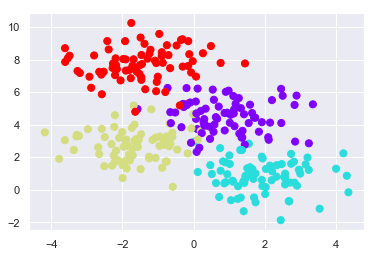

In [24]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Para construir el árbol, dividiremos los datos iterativamente en uno u otro eje, de acuerdo a un criterio, y asignando a cada nueva región la etiqueta correspondiente al voto mayoritario de los puntos que queden dentro. Las 4 primeras iteraciones serían así:

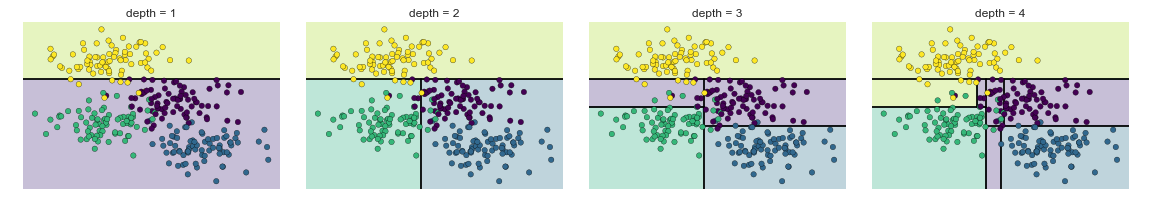

La región amarilla no se vuelve a dividir porque todos los puntos dentro son amarillos, pero en cada iteración se podrían dividir todas las regiones existentes. Esto se puede conseguir con Scikit-Learn usando `DecisionTreeClassifier`:

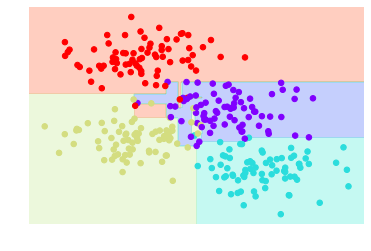

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

# Visualización
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)

El **sobreajuste** es una característica inherente a los árboles de decisión; es muy sencillo pasarse con la profundidad, como en el ejemplo, donde vemos zonas muy estrechas.

Una solución para reducir el sobreajuste sería crear varios subconjuntos de datos de entrenamiento para dar lugar a distintos árboles de decisión, de tal forma que en las zonas donde difieran estos árboles podamos obtener un mejor resultado, mezclando los resultados de cada uno. Y eso es Random Forests!

### Ensamblado de estimadores

El concepto de combinar múltiples estimadores para reducir el sobreajuste y mejorar la estabilidad de los algoritmos es la base del **bagging** o *embolsado*. El bagging hace uso de un conjunto (bolso) de estimadores paralelos con sobreajuste, y promedia sus resultados para encontrar una clasificación mejor. Un *ensamblado de árboles de decisión aleatorios* es lo que se conoce como un bosque aleatorio o **random forest**

El bagging se puede implementar el Scikit-Learn usando `BaggingClassifier`. En el siguiente ejemplo hemos ajustado cada estimador (100 en total) a un subconjunto de datos aleatorios conteniendo un 80% del dataset original.

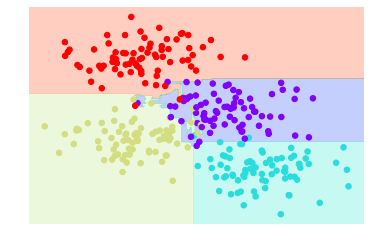

In [26]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Esto se puede optimizar haciendo que los subconjuntos seán aún más aleatorios. Lograremos eso mismo usando `RandomForestClassifier`, que se encarga de todo:

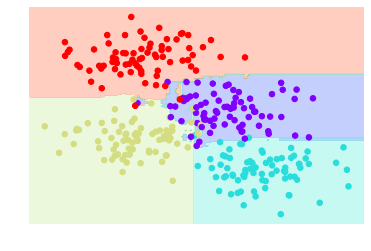

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### Regresión con Random Forests

Los "bosques aleatorios" funcionan muy bien para clasificación, pero también pueden usarse para problemas de regresión. Para eso tenemos `RandomForestRegressor`.

Consideramos el siguiente problema:

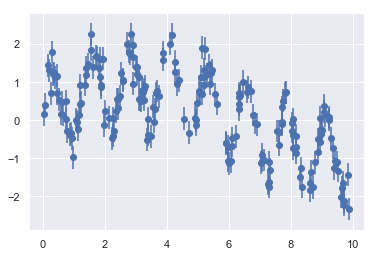

In [28]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Buscamos la curva (regresión no lineal) que mejor se ajuste:

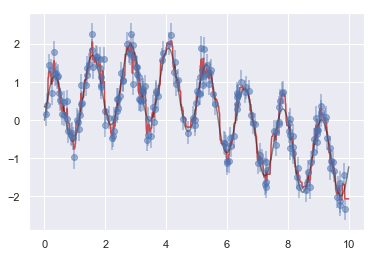

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Podemos observar como el modelo se ajusta muy bien a los datos, a pesar de que no tiene parámetros y se trata de unos datos peculiares por su periodicidad.

### Cuándo usar Random Forests

Ventajas:
 * Es muy rápido y simple. El entrenamiento y la predicción se pueden paralelizar
 * La multiplicidad de árboles permite una clasificación probabilística; el voto mayoritario arroja una estimación de la probabilidad (que podemos consultar con `predict_proba()`)
 * No tiene parámetros
 
Desventajas:
 * Los resultados no son fácilmente interpretables

## Análisis de componentes principales

El Análisis de componentes principales (**PCA**) pertenece al grupo de los métodos de aprendizaje **no supervisado**. Es fundamentalmente un algoritmo de **reducción de la dimensionalidad**, pero también se usa para visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.

### PCA para describir un dataset

Vemos un dataset de ejemplo con puntos en 2 dimensiones, que se ajusta bien con una regresión lineal. Trataremos de aplicarle PCA para obtener una idea de la relación entre los valores de x y los de y; en este caso cuantificada a través de los ejes "principales" de los datos:

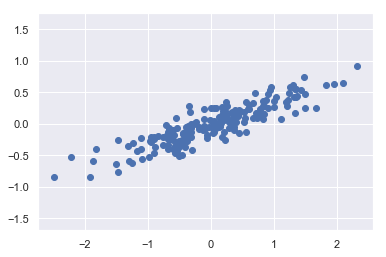

In [30]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

pca.components_: [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
pca.explained_variance_: [0.7625315 0.0184779]
pca.mean_: [ 0.03351168 -0.00408072]


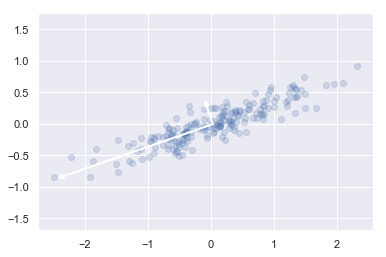

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print("pca.components_:", pca.components_)                  # usado como dirección de los vectores
print("pca.explained_variance_:", pca.explained_variance_)  # usado definir longitud al cuadrado de los vectores
print("pca.mean_:", pca.mean_)                              # usado como origen

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)                                  # fórmula mágica!!!
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

La dirección de los ejes nos dicen cómo se distribuyen los datos, y su longitud nos da la importancia del eje a la hora de describir los datos. Si proyectamos los datos sobre esos ejes tendríamos los famosos **componentes principales**. Algo como lo que vemos en la imagen:

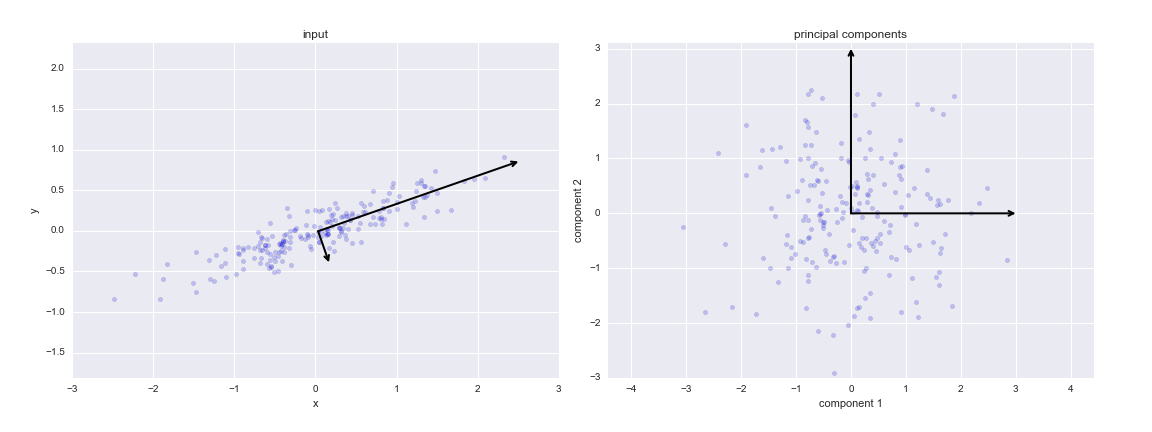

Aunque parezca que esto sólo es interesante como curiosidad matemática, lo cierto es que se usa bastante.

### PCA para reducir la dimensionalidad

Aplicar PCA implica crear una proyeccion de los datos en menos dimensiones, preservando la máxima varianza.

Vemos un ejemplo:

In [32]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Hemos pasado de 2 a 1 dimensión. Para entender el efecto podemos realizar la transformación inversa del resultado y comparar con los datos originales en 2D:

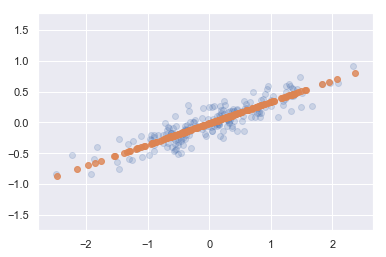

In [33]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Aquí se entiende muy bien lo que ha pasado; la información en el eje principal con menos importancia ha sido eliminada, dejando sólo los componentes con mayor varianza. La varianza del eje eliminado nos da una idea de la pérdida de información que supone esta reducción; a pesar de eliminarse muchos datos, la relación se ha preservado bastante.

### PCA para visualización

Su aplicación es muy útil cuando queremos representar de forma sencilla los datos que tienen demasiadas dimensiones.

Vemos PCA aplicado al problema de caracteres manuscritos, proyectando 64 dimensiones en 2 de forma no supervisada (sin conocer las etiquetas):

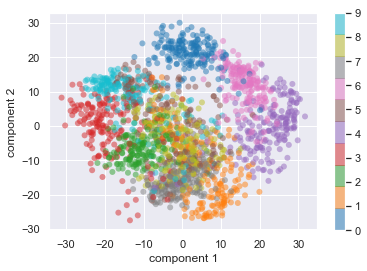

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()

pca = PCA(2) #  de 64D a 2D
projected = pca.fit_transform(digits.data)

plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Una parte vital de usar PCA en la práctica es la habilidad para estimar cuántas componentes se necesitan para describir los datos bien. Una herramienta para tomar esa decisión es la representación de la *varianza explicada* acumulada frente al número de componentes usado; lo que nos muestra la parte de la varianza total que se debe a las componentes implicadas:

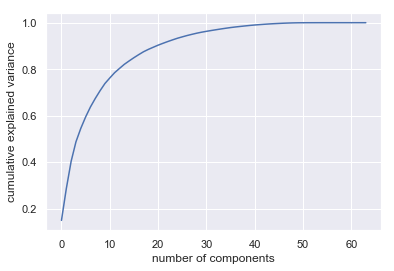

In [35]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Observamos que en nuestro ejemplo anterior, para 2 componentes, la información que mantenemos es muy poca. Tendremos que fijar un mínimo de varianza mantenida para que la reducción sea aceptable.

### PCA para filtrado de ruido

La teoría es que el ruido no debería influir en la varianza, porque en principio afecta a todas las observaciones de forma similar. Entonces si transformamos los datos usando sólo las componentes principales, eliminaremos buena parte del ruido manteniendo mucha información.

Añadimos ruido a nuestros dígitos manuscritos:

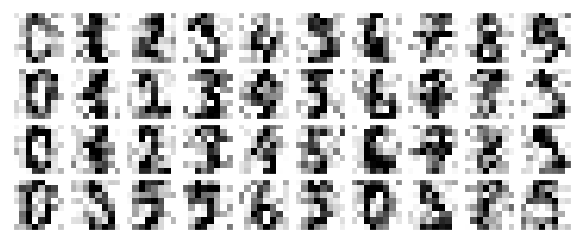

In [36]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        
plot_digits(noisy)

Usamos PCA, indicando como parámetro la varianza que queremos preservar; en este caso el 50%:

pca.n_components_: 12


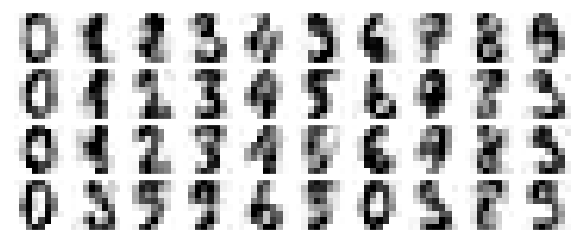

In [37]:
pca = PCA(0.50).fit(noisy)
print("pca.n_components_:", pca.n_components_)

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Podemos aplicar la misma teoría a la selección de características, de modo que al descartar componentes no principales podremos entrenar más rápido, y posiblemente estemos descartando ruido.

Por ejemplo, para el caso del reconocimiento facial, donde tenemos muchos más pixeles. Aplicar PCA nos reducirá drásticamente el número de componentes, sin perjudicar mucho a las características principales de la imagen; erá algo así como reducir su definición, pero en esencia la cara sigue siendo reconocible, y es posible que hayamos eliminado ruido.

Este es el resultado de pasar de 3000 a 150 componentes para el dataset con caras de presidentes:

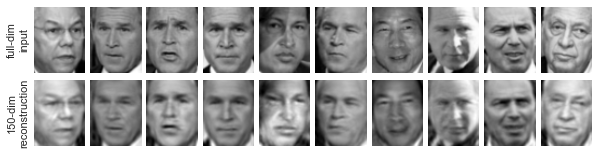

### Cuándo usar PCA

Ventajas:
 * Funciona muy bien para los casos expuestos

Desventajas:
 * Se ve bastante afectado por los outliers, aunque hay formas de lidiar con ellos. En Scikit-Learn tenemos parámetros en `PCA()` para poder aplicar ciertas técnicas, como el aleatorizado o la regularización.
 * No funciona tan bien cuando hay relaciones no lineales dentro de los datos.